In [1]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/Users/sakka/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# Datasets

In [16]:
train_df = pd.read_csv("../../data/datasets/train_600_10.csv")
test_df = pd.read_csv("../../data/datasets/test_600_10.csv")

In [17]:
# check data balance, and convert numpy
y_train = train_df["label"].values
print("***************** Train *****************")
print("Level 1: {0} ({1} %)".format(np.sum(y_train == 0), 100*np.sum(y_train == 0)/len(y_train)))
print("Level 2: {0} ({1} %)".format(np.sum(y_train == 1), 100*np.sum(y_train == 1)/len(y_train)))
print("Level 3: {0} ({1} %)".format(np.sum(y_train == 2), 100*np.sum(y_train == 2)/len(y_train)))
print("Level 4: {0} ({1} %)".format(np.sum(y_train == 3), 100*np.sum(y_train == 3)/len(y_train)))
print("Level 5: {0} ({1} %)".format(np.sum(y_train == 4), 100*np.sum(y_train == 4)/len(y_train)))
print("****************************************")

#dataset_df = dataset_df.drop(["label", "max", "var"], axis=1)
train_df = train_df.drop(["label"], axis=1)
X_train = train_df.values

print("Train shape: {}".format(X_train.shape))

***************** Train *****************
Level 1: 93648 (47.542123779692254 %)
Level 2: 31345 (15.912863807817077 %)
Level 3: 61618 (31.28150716573848 %)
Level 4: 9750 (4.949766218733977 %)
Level 5: 618 (0.3137390280182151 %)
****************************************
Train shape: (196979, 2946)


In [18]:
# check data balance, and convert numpy
y_test = test_df["label"].values
print("***************** Test *****************")
print("Level 1: {0} ({1} %)".format(np.sum(y_test == 0), 100*np.sum(y_test == 0)/len(y_test)))
print("Level 2: {0} ({1} %)".format(np.sum(y_test == 1), 100*np.sum(y_test == 1)/len(y_test)))
print("Level 3: {0} ({1} %)".format(np.sum(y_test == 2), 100*np.sum(y_test == 2)/len(y_test)))
print("Level 4: {0} ({1} %)".format(np.sum(y_test == 3), 100*np.sum(y_test == 3)/len(y_test)))
print("Level 5: {0} ({1} %)".format(np.sum(y_test == 4), 100*np.sum(y_test == 4)/len(y_test)))
print("****************************************")

#test_df = test_df.drop(["label", "max", "var"], axis=1)
test_df = test_df.drop("label", axis=1)
X_test = test_df.values

print("Test shape: {}".format(X_test.shape))

***************** Test *****************
Level 1: 14903 (52.960199004975124 %)
Level 2: 3888 (13.816631130063966 %)
Level 3: 8072 (28.68514570007107 %)
Level 4: 1207 (4.289267945984364 %)
Level 5: 70 (0.24875621890547264 %)
****************************************
Test shape: (28140, 2946)


# Train

In [20]:
lgb_train = lgb.Dataset(X_train, y_train, feature_name=list(train_df.columns))
lgb_test  = lgb.Dataset(X_test, y_test, reference=lgb_train)

prams = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 5,
    'num_leaves' : 2**6, # changed
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'metric': 'multi_logloss',
    # added 
    'max_depth': 5,
    'bagging_freq': 1,
    'min_data_in_leaf': 1,
    'min_sum_hessian_in_leaf': 1,
    'lambda_l2': 1,
    'verbose': -1,
}

gbm = lgb.train(prams,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_test,
                early_stopping_rounds=5)

[1]	valid_0's multi_logloss: 1.09286
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.0787
[3]	valid_0's multi_logloss: 1.06566
[4]	valid_0's multi_logloss: 1.05546
[5]	valid_0's multi_logloss: 1.04575
[6]	valid_0's multi_logloss: 1.03735
[7]	valid_0's multi_logloss: 1.02966
[8]	valid_0's multi_logloss: 1.02316
[9]	valid_0's multi_logloss: 1.01789
[10]	valid_0's multi_logloss: 1.01301
[11]	valid_0's multi_logloss: 1.00909
[12]	valid_0's multi_logloss: 1.00514
[13]	valid_0's multi_logloss: 1.00191
[14]	valid_0's multi_logloss: 0.999534
[15]	valid_0's multi_logloss: 0.997689
[16]	valid_0's multi_logloss: 0.996074
[17]	valid_0's multi_logloss: 0.994824
[18]	valid_0's multi_logloss: 0.992774
[19]	valid_0's multi_logloss: 0.991774
[20]	valid_0's multi_logloss: 0.990362
[21]	valid_0's multi_logloss: 0.989016
[22]	valid_0's multi_logloss: 0.988079
[23]	valid_0's multi_logloss: 0.98706
[24]	valid_0's multi_logloss: 0.98671
[25]	valid_0's multi_logloss

In [21]:
np.argmax(gbm.predict(X_test, num_iteration=gbm.best_iteration), axis=1)

array([2, 2, 2, ..., 2, 2, 2])

In [22]:
pred_train = np.argmax(gbm.predict(X_train, num_iteration=gbm.best_iteration), axis=1)
pred_test = np.argmax(gbm.predict(X_test, num_iteration=gbm.best_iteration), axis=1)

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)

target_names = ["level 1", "level 2", "level 3", "level 4", "level 5"]

print("*********************************************")
print("Train Accuracy: {}".format(train_acc))
print("Confusion Matrix: \n{}".format(confusion_matrix(y_train, pred_train)))
print("Classification report: \n{}".format(classification_report(y_train, pred_train, target_names=target_names)))
print("*********************************************")

print("*********************************************")
print("Test Accuracy: {}".format(test_acc))
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, pred_test)))
print("Classification report: \n{}".format(classification_report(y_test, pred_test, target_names=target_names)))
print("*********************************************")

*********************************************
Train Accuracy: 0.6165682636220104
Confusion Matrix: 
[[73769    34 19832     0    13]
 [11091  1158 19089     0     7]
 [15694    12 45901     0    11]
 [ 2733     0  6998    12     7]
 [    2     0     5     0   611]]
Classification report: 
             precision    recall  f1-score   support

    level 1       0.71      0.79      0.75     93648
    level 2       0.96      0.04      0.07     31345
    level 3       0.50      0.74      0.60     61618
    level 4       1.00      0.00      0.00      9750
    level 5       0.94      0.99      0.96       618

avg / total       0.70      0.62      0.56    196979

*********************************************
*********************************************
Test Accuracy: 0.5735252309879175
Confusion Matrix: 
[[11894    53  2953     0     3]
 [ 2194     4  1690     0     0]
 [ 3892     3  4172     1     4]
 [  555     0   651     0     1]
 [    1     0     0     0    69]]
Classification report: 
 

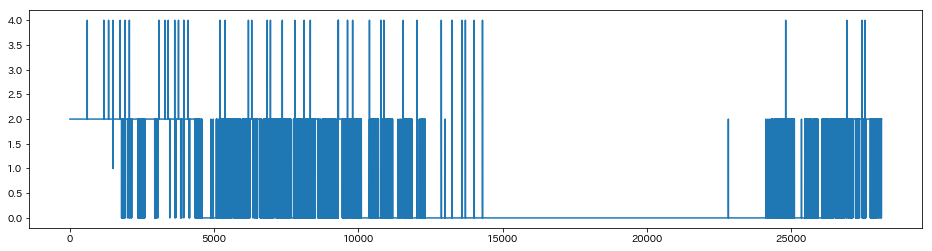

In [23]:
plt.figure(figsize=(16, 4))
plt.plot(pred_test)

*********************************************
Train Accuracy: 0.6518253113176818
Confusion Matrix: 
[[75543    81 18358     3     4]
 [ 7648  1146 23764     4     3]
 [ 9642    80 52681     9     2]
 [ 1679    43  8156    73     4]
 [    0     0     0     0   632]]
Classification report: 
             precision    recall  f1-score   support

    level 1       0.80      0.80      0.80     93989
    level 2       0.85      0.04      0.07     32565
    level 3       0.51      0.84      0.64     62414
    level 4       0.82      0.01      0.01      9955
    level 5       0.98      1.00      0.99       632

avg / total       0.72      0.65      0.59    199555

*********************************************
*********************************************
Test Accuracy: 0.6644099901781956
Confusion Matrix: 
[[11910     0  2976     0     4]
 [ 1103     1  2754     0     0]
 [ 1455     1  6956     1     6]
 [  192     0  1073     1     1]
 [    1     0     0     0    73]]
Classification report: 
             precision    recall  f1-score   support

    level 1       0.81      0.80      0.81     14890
    level 2       0.50      0.00      0.00      3858
    level 3       0.51      0.83      0.63      8419
    level 4       0.50      0.00      0.00      1267
    level 5       0.87      0.99      0.92        74

avg / total       0.67      0.66      0.61     28508

*********************************************